# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load and Prepare Data

In [2]:
# Load the dataset
df_train = pd.read_csv('../../2_Modeling-Phase/train_and_test_datasets/NSL-KDD/train.csv')
df_test = pd.read_csv('../../2_Modeling-Phase/train_and_test_datasets/NSL-KDD/test.csv')

# Separate features and target variable
X_train = df_train.drop(['binary_attack'], axis=1)
y_train = df_train['binary_attack']

X_test = df_test.drop(['binary_attack'], axis=1)
y_test = df_test['binary_attack']

# Split training data into train/validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Verify shapes
print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (100778, 42) (100778,)
Validation shape: (25195, 42) (25195,)
Test shape: (22544, 42) (22544,)


# Scale the Data

In [3]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train the Bayesian Model

In [5]:
# Initialize and train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# Evaluate the model on the validation set
y_val_pred = gnb.predict(X_val_scaled)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

Validation Accuracy: 0.8975590394919627


# Test the Model

In [6]:
# Test the model on the test set
y_test_pred = gnb.predict(X_test_scaled)

# Evaluate the performance
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8007008516678495


# Confusion Matrix and Classification Report

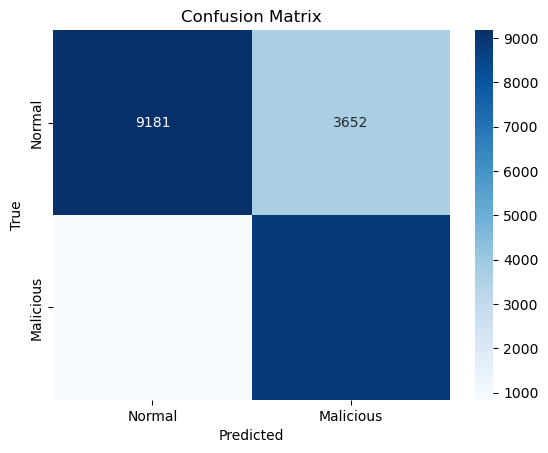

              precision    recall  f1-score   support

           0       0.92      0.72      0.80     12833
           1       0.71      0.91      0.80      9711

    accuracy                           0.80     22544
   macro avg       0.81      0.81      0.80     22544
weighted avg       0.83      0.80      0.80     22544



In [7]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Malicious'], yticklabels=['Normal', 'Malicious'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_test_pred))

# Save the Model

In [8]:
import joblib

# Save the trained model
model_folder = "../../3_Post-Modeling-Phase/Trained_ML_models/Models-NSL-KDD/"
model_filename = "NSL-KDD_Bayesian.joblib"
model_path = model_folder + model_filename

# Save the model using joblib
joblib.dump(gnb, model_path)
print(f"Bayesian model saved to: {model_path}")

Bayesian model saved to: ../../3_Post-Modeling-Phase/Trained_ML_models/Models-NSL-KDD/NSL-KDD_Bayesian.joblib
